In [0]:
!pip install -q keras

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from __future__ import print_function
import keras
from keras.preprocessing.image import ImageDataGenerator, load_img

Using TensorFlow backend.


In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
!pip install kaggle

    100% |████████████████████████████████| 61kB 5.3MB/s 
    100% |████████████████████████████████| 245kB 14.5MB/s 
  Running setup.py bdist_wheel for kaggle ... - \ done
  Stored in directory: /root/.cache/pip/wheels/8b/21/3b/a0076243c6ae12a6215b2da515fe06b539aee7217b406e510e
  Running setup.py bdist_wheel for python-slugify ... - done
  Stored in directory: /root/.cache/pip/wheels/e3/65/da/2045deea3098ed7471eca0e2460cfbd3fdfe8c1d6fa6fcac92
Successfully built kaggle python-slugify


In [0]:
!mkdir .kaggle

In [0]:
import json

token = {"username":"shreyshah2307","key":"0a50acf405130015e106547d45678259"}
with open('/content/.kaggle/kaggle.json', 'w') as file:
  json.dump(token, file)

In [0]:
!chmod 600 /content/.kaggle/kaggle.json

In [0]:
!cp /content/.kaggle/kaggle.json ~/.kaggle/kaggle.json

In [13]:
!kaggle datasets download -d jangedoo/utkface-new -p /content

 98% 161M/165M [00:02<00:00, 66.3MB/s]
100% 165M/165M [00:02<00:00, 58.3MB/s]


In [0]:
!unzip utkface-new.zip

In [0]:
!rm -rf /content/crop_part1

In [0]:
!mkdir Datasets

In [41]:
cd Datasets

/content/Datasets


In [0]:
!mkdir train
!mkdir validate
!mkdir test

In [42]:
cd train

/content/Datasets/train


In [25]:
!mkdir 0
!mkdir 1
!mkdir 2
!mkdir 3
!mkdir 4

mkdir: cannot create directory ‘0’: File exists


In [52]:
cd ./../test

/content/Datasets/test


In [0]:
!mkdir 0
!mkdir 1
!mkdir 2
!mkdir 3
!mkdir 4

In [51]:
cd ./../validate

/content/Datasets/validate


In [0]:
!mkdir 0
!mkdir 1
!mkdir 2
!mkdir 3
!mkdir 4

In [54]:
cd ./../..

/content


In [55]:
cd UTKFace

/content/UTKFace


In [0]:
!mv 39_1_20170116174525125.jpg.chip.jpg 39_1_1_20170116174525125.jpg.chip.jpg
!mv 61_1_20170109142408075.jpg.chip.jpg 61_1_1_20170109142408075.jpg.chip.jpg
!mv 61_1_20170109150557335.jpg.chip.jpg 61_1_3_20170109150557335.jpg.chip.jpg

In [57]:
cd ./..

/content


In [0]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import glob
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image

In [0]:
DATA_DIR = "./UTKFace"
files = glob.glob(os.path.join(DATA_DIR, "*.jpg"))
c=0
for i in files:
    files[c]=i[0:9]+'/'+i[10:]
    c=c+1

In [0]:
p = np.random.permutation(len(files))
train_up_to = int(len(files) * 0.7)
train_idx = p[:train_up_to]
test_idx = p[train_up_to:]

# split train_idx further into training and validation set
train_up_to = int(train_up_to * 0.7)
train_idx, valid_idx = train_idx[:train_up_to], train_idx[train_up_to:]

In [0]:
for i in train_idx:
    path, filename = os.path.split(files[i])
    filename, ext = os.path.splitext(filename)
    age, gender, race, _ = filename.split("_")
    os.rename(files[i],"./Datasets/train/"+race+"/"+files[i][10:])
for i in test_idx:
    path, filename = os.path.split(files[i])
    filename, ext = os.path.splitext(filename)
    age, gender, race, _ = filename.split("_")
    os.rename(files[i],"./Datasets/test/"+race+"/"+files[i][10:])
for i in valid_idx:
    path, filename = os.path.split(files[i])
    filename, ext = os.path.splitext(filename)
    age, gender, race, _ = filename.split("_")
    os.rename(files[i],"./Datasets/validate/"+race+"/"+files[i][10:])

In [0]:
!rm -rf UTKFace

In [66]:
cd Datasets

/content/Datasets


In [0]:
train_dir = 'train'
validation_dir = 'validate'
test_dir = 'test'
image_size = 200

In [0]:
from keras.applications import VGG16

#Load the VGG model
vgg_conv = VGG16(weights='imagenet', include_top=False, input_shape=(image_size, image_size, 3))

# Freeze all the layers
for layer in vgg_conv.layers[:-4]: #rohit change to -1
    layer.trainable = False

# Check the trainable status of the individual layers
for layer in vgg_conv.layers:
    print(layer, layer.trainable)


from keras import models
from keras import layers
from keras import optimizers

# Create the model
model = models.Sequential()

# Add the vgg convolutional base model
model.add(vgg_conv)

# Add new layers
model.add(layers.Flatten())
model.add(layers.Dense(1024, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(5, activation='softmax'))

# Show a summary of the model. Check the number of trainable parameters
model.summary()

<keras.engine.input_layer.InputLayer object at 0x7f9cc7c05d68> False
<keras.layers.convolutional.Conv2D object at 0x7f9cc794f5c0> False
<keras.layers.convolutional.Conv2D object at 0x7f9cc7c0d588> False
<keras.layers.pooling.MaxPooling2D object at 0x7f9cc7c0d7b8> False
<keras.layers.convolutional.Conv2D object at 0x7f9cc7c0da20> False
<keras.layers.convolutional.Conv2D object at 0x7f9cc79a1ba8> False
<keras.layers.pooling.MaxPooling2D object at 0x7f9cc79724e0> False
<keras.layers.convolutional.Conv2D object at 0x7f9cc7972208> False
<keras.layers.convolutional.Conv2D object at 0x7f9cc665d240> False
<keras.layers.convolutional.Conv2D object at 0x7f9cc66445f8> False
<keras.layers.pooling.MaxPooling2D object at 0x7f9cc662d400> False
<keras.layers.convolutional.Conv2D object at 0x7f9cc662ddd8> False
<keras.layers.convolutional.Conv2D object at 0x7f9cc65fc240> False
<keras.layers.convolutional.Conv2D object at 0x7f9cc67e95f8> False
<keras.layers.pooling.MaxPooling2D object at 0x7f9cc67c0400>

Found 11616 images belonging to 5 classes.
Found 4979 images belonging to 5 classes.
Epoch 1/50
59/58 [==============================] - 149s 3s/step - loss: 1.2864 - acc: 0.4964 - val_loss: 0.9472 - val_acc: 0.6431
Epoch 2/50
59/58 [==============================] - 144s 2s/step - loss: 0.8306 - acc: 0.7000 - val_loss: 0.9840 - val_acc: 0.6654
Epoch 3/50
59/58 [==============================] - 143s 2s/step - loss: 0.6977 - acc: 0.7539 - val_loss: 0.6856 - val_acc: 0.7574
Epoch 4/50
59/58 [==============================] - 143s 2s/step - loss: 0.5828 - acc: 0.7959 - val_loss: 0.6666 - val_acc: 0.7660
Epoch 5/50
59/58 [==============================] - 143s 2s/step - loss: 0.5221 - acc: 0.8186 - val_loss: 0.6176 - val_acc: 0.7897
Epoch 6/50
59/58 [==============================] - 143s 2s/step - loss: 0.4300 - acc: 0.8506 - val_loss: 0.6342 - val_acc: 0.7851
Epoch 7/50
59/58 [==============================] - 143s 2s/step - loss: 0.3862 - acc: 0.8692 - val_loss: 0.6238 - val_acc: 0.790

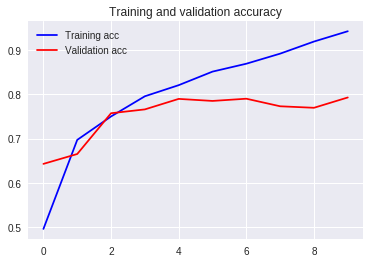

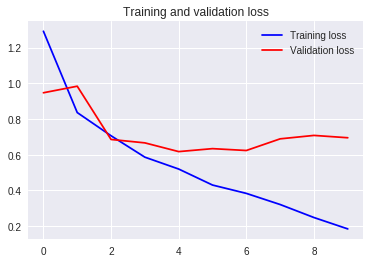

In [0]:
from keras.callbacks import EarlyStopping

# No Data augmentation 
train_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Change the batchsize according to your system RAM
train_batchsize = 200 #was 100
val_batchsize = 50 # was 10
test_batchsize = 100

# Data Generator for Training data
train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(image_size, image_size),
        batch_size=train_batchsize,
        class_mode='categorical')

# Data Generator for Validation data
validation_generator = validation_datagen.flow_from_directory(
        validation_dir,
        target_size=(image_size, image_size),
        batch_size=val_batchsize,
        class_mode='categorical',
        shuffle=False)

# Compile the model
model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.Adam(lr=1e-4),
              metrics=['acc'])

callbacks = [EarlyStopping(monitor='val_loss', patience=5, verbose=1, mode='min')]

# Train the Model
history = model.fit_generator(
      train_generator,
      steps_per_epoch=train_generator.samples/train_generator.batch_size ,
      epochs=50,
      callbacks=callbacks,
      validation_data=validation_generator,
      validation_steps=validation_generator.samples/validation_generator.batch_size,
      verbose=1)

# Save the Model
model.save('all_freezed.h5')

# Plot the accuracy and loss curves
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()


In [0]:
# Create a generator for prediction
test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(image_size, image_size),
        batch_size=test_batchsize,
        class_mode='categorical',
        shuffle=False)

# Get the filenames from the generator
fnames = test_generator.filenames

# Get the ground truth from generator
ground_truth = test_generator.classes

# Get the label to class mapping from the generator
label2index = test_generator.class_indices

# Getting the mapping from class index to class label
idx2label = dict((v,k) for k,v in label2index.items())

# Get the predictions from the model using the generator
predictions = model.predict_generator(test_generator, steps=test_generator.samples/test_generator.batch_size,verbose=1)
predicted_classes = np.argmax(predictions,axis=1)

errors = np.where(predicted_classes != ground_truth)[0]
print("No of errors = {}/{}".format(len(errors),test_generator.samples))

Found 7113 images belonging to 5 classes.
72/71 [==============================] - 58s 810ms/step
No of errors = 1439/7113


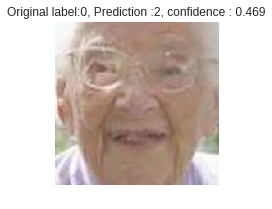

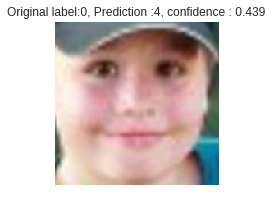

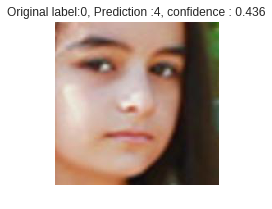

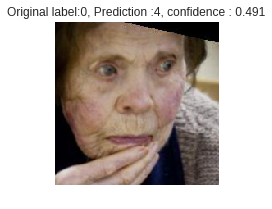

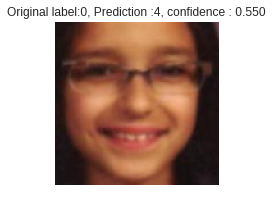

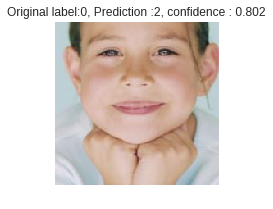

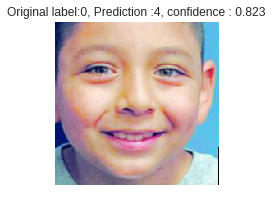

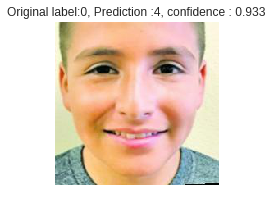

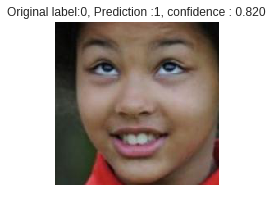

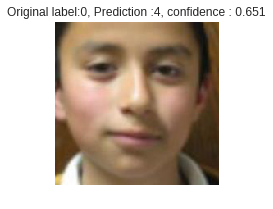

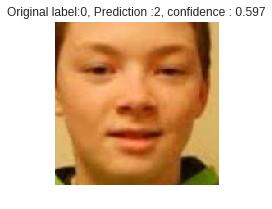

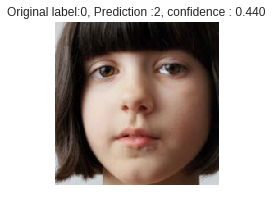

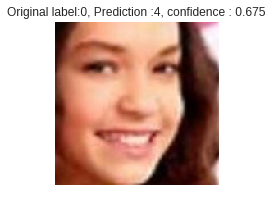

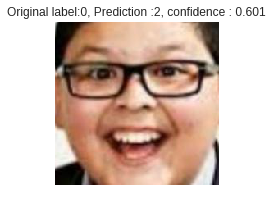

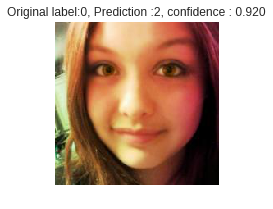

In [0]:
# Show the errors
for i in range(15):
    pred_class = np.argmax(predictions[errors[i]])
    pred_label = idx2label[pred_class]
    
    title = 'Original label:{}, Prediction :{}, confidence : {:.3f}'.format(
        fnames[errors[i]].split('/')[0],
        pred_label,
        predictions[errors[i]][pred_class])
    
    original = load_img('{}/{}'.format(test_dir,fnames[errors[i]]))
    plt.figure(figsize=[3,3])
    plt.axis('off')
    plt.title(title)
    plt.imshow(original)
    plt.show()